In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import psutil
import plotly.io as pio
from Unemployment import *
from Suicide import *


In [4]:
unemp_merge = unemp[['country', 'year', 'gender', 'age', 'unemploy_rate']]
unemp_merge

,country,year,gender,age,unemploy_rate
8276,Australia,2000,male,15-24,12.893657
8277,Australia,2001,male,15-24,14.594205
8278,Australia,2002,male,15-24,13.792139
8279,Australia,2003,male,15-24,12.607881
8280,Australia,2004,male,15-24,11.846482
...,...,...,...,...,...
194832,Costa Rica,2012,female,55-74,0.549501
194833,Costa Rica,2013,female,55-74,3.471880
194834,Costa Rica,2014,female,55-74,0.000000
194835,Costa Rica,2015,female,55-74,1.064260


In [5]:
unemp_merge_ages = unemp_merge.groupby('age').mean().round(2)
unemp_merge_ages.drop(columns='year', inplace=True)
unemp_merge_ages

,unemploy_rate
age,
15-24,18.68
25-34,9.07
35-54,6.37
55-74,3.06


In [6]:
fig_ages_unemp = px.pie(unemp_merge_ages, values='unemploy_rate', names=unemp_merge_ages.index, title='Unemployment Mean Rate per Age Range, 2000-2016', color_discrete_sequence=px.colors.sequential.RdBu_r)
fig_ages_unemp.show()
fig_ages_unemp.write_html("..\\reports\\html\\unemp_ages_pie.html")
fig_ages_unemp.write_image("..\\reports\\png\\unemp_ages_pie.png")

In [7]:
suic_merge = suic.loc[~suic["age"].str.contains("5-14")]                                    #discarding ages which are non-worker ages
suic_merge = suic_merge.loc[~suic["age"].str.contains("75+")]
suic_merge

,country,year,gender,age,suicides_no,population,suic_100k
2412,Australia,2000,female,15-24,78.0,1285283.0,6.07
2413,Australia,2000,female,25-34,106.0,1445332.0,7.33
2414,Australia,2000,female,35-54,200.0,2782583.0,7.19
2416,Australia,2000,female,55-74,87.0,1549060.0,5.62
2418,Australia,2000,male,15-24,271.0,1333011.0,20.33
...,...,...,...,...,...,...,...
41908,United Kingdom,2016,female,55-74,NaN,7226689.0,NaN
41910,United Kingdom,2016,male,15-24,NaN,4115995.0,NaN
41911,United Kingdom,2016,male,25-34,NaN,4474107.0,NaN
41912,United Kingdom,2016,male,35-54,NaN,8707736.0,NaN


In [8]:
suic_merge_ages = suic_merge.groupby('age').mean().round(2)
suic_merge_ages.drop(columns=['year', 'population'], inplace=True)
suic_merge_ages

,suicides_no,suic_100k
age,,
15-24,201.34,9.28
25-34,286.99,12.70
35-54,680.60,17.42
55-74,471.28,18.45


In [9]:
fig_ages_suic = px.pie(suic_merge_ages, values='suicides_no', names=unemp_merge_ages.index, title='Suicide Mean Rate per Age Range, per 100k/people, 2000-2016',color_discrete_sequence=px.colors.sequential.RdBu)
fig_ages_suic.show()
fig_ages_suic.write_html("..\\reports\\html\\suic_ages_pie.html")
fig_ages_suic.write_image("..\\reports\\png\\suic_ages_pie.png", width=1280, height=960)

In [10]:
mrg_ages = pd.merge(unemp_merge_ages, suic_merge_ages, on='age', how='inner')
mrg_ages

,unemploy_rate,suicides_no,suic_100k
age,,,
15-24,18.68,201.34,9.28
25-34,9.07,286.99,12.70
35-54,6.37,680.60,17.42
55-74,3.06,471.28,18.45


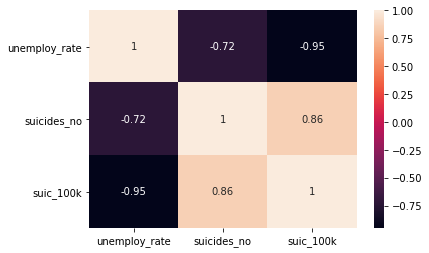

In [11]:
mrg_ages_matrix = sns.heatmap(mrg_ages.corr(), xticklabels=mrg_ages.columns, yticklabels=mrg_ages.columns, annot=True)
mrg_ages_matrix
a4_dims = (11.7, 8.27)
mrg_ages_matrix.figure.savefig("..\\reports\\png\\correlation_matrix.png", dpi=1200, figsize=a4_dims ,bbox_inches='tight')

In [12]:
unemp_merge_countries = pd.pivot_table(unemp_merge, index='country', values='unemploy_rate')
unemp_merge_countries

,unemploy_rate
country,
Australia,4.958943
Austria,3.859364
Belgium,6.833760
Brazil,7.050953
Bulgaria,10.459153
Canada,6.192324
Chile,7.907183
Colombia,9.639394
Costa Rica,6.243057


In [13]:
suic_merge_countries = pd.pivot_table(suic_merge, index='country', values=['suic_100k'])
suic_merge_countries

,suic_100k
country,
Australia,13.631583
Austria,15.822500
Belgium,19.862891
Brazil,6.342734
Bulgaria,11.632167
Canada,13.157143
Chile,14.047031
Colombia,6.817344
Costa Rica,8.745417


In [14]:
mrg_countries = pd.merge(unemp_merge_countries, suic_merge_countries, on='country', how='inner')
mrg_countries = mrg_countries.sort_values('unemploy_rate')
mrg_countries

,unemploy_rate,suic_100k
country,,
Mexico,3.074199,5.735703
Norway,3.092261,13.651797
Switzerland,3.397881,15.613203
Austria,3.859364,15.822500
Iceland,3.925652,15.561985
Japan,4.197353,23.701406
Denmark,4.374658,11.533828
New Zealand,4.388648,15.920179
Luxembourg,4.585378,12.834375


In [29]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=mrg_countries.index, y=mrg_countries.unemploy_rate,mode='markers+lines', name="Unemployment Rate %"))
fig.add_trace(go.Scatter(x=mrg_countries.index, y=mrg_countries.suic_100k, mode='markers+lines', name="Suicide Rate per 100k/population"))
fig.update_layout(legend=dict(x=0,y=1),xaxis=dict(tickmode='linear', tick0=0, tickangle=320), width=1500, height=750, title="Unemployment and Suicide Mean Rates Contrasted, 200-2016")
fig.show()
fig.write_html("..\\reports\\html\\contrast_lines_countries.html")
fig.write_image("..\\reports\\png\\contrast_lines_countries.png", width=1280, height=960)

In [16]:
#fig2= px.bar_polar(sp_un, r="unemploy_rate", theta = "gender",
                 #color = "age", template = "plotly_dark",
                 #color_discrete_sequence = px.colors.sequential.Plasma_r)
#fig2.show()
#fig2.write_html("..\\reports\\html\\contrast_lines_ages.html")
#fig2.write_image("..\\reports\\png\\contrast_lines_ages.png")

In [17]:
unemp_merge_gender = pd.pivot_table(unemp_merge, index='gender', values='unemploy_rate')
unemp_merge_gender

,unemploy_rate
gender,
female,7.435541
male,7.022736


In [18]:
suic_merge_gender = pd.pivot_table(suic_merge, index='gender', values=['suic_100k', 'suicides_no'])
suic_merge_gender

,suic_100k,suicides_no
gender,,
female,5.903444,170.914190
male,23.027619,649.192422


In [19]:
gendermerge = pd.merge(suic_merge_gender, unemp_merge_gender, on='gender')
gendermerge

,suic_100k,suicides_no,unemploy_rate
gender,,,
female,5.903444,170.914190,7.435541
male,23.027619,649.192422,7.022736


In [20]:
unemp.x = px.data.gapminder().query("country == 'Spain'")
fig = px.pie(unemp, values='unemploy_rate', names='year',
             title='Unemployment per year per gender',
             hover_data=['gender'], labels={'gender':'gender'})
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [32]:
labels = ['Data Search','Data Cleaning','Data Analysis','Data Plotting', 'Format Adapting']
values = [5, 50, 35, 25]

fig5 = go.Figure(data=[go.Pie(labels=labels, values=values, textfont=dict(color='black',size=18))]
fig5.show()
fig5.write_html("..\\reports\\html\\pie.html")
fig5.write_image("..\\reports\\png\\pie.png", width=1280, height=960)

SyntaxError: invalid syntax (<ipython-input-32-ad40a6186633>, line 5)